<font size = 2> <B> PHILIP AUERBACH <BR>UNI: PJA2113 </B></font>

<font size = 2> <B> Analysing Drinking Around the World </B></font><br> <B> Lab #1 </B> <br> Description of Project: <br> The goal of this project is to do some basic analysis and developt a understanding of basic functions of data analysis utilizing python and stats libraries. The project utilizes a dataset that was collected by the World Health Organization in 2010. It is a dataset that compares alcohol consumption by different countries. <br> The project data source comes from and was inspired by  https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/   

<font size="2"> <B> IMPORTING LIBRARIES / PACKAGES </font> </B> <br> To begin this project we need to import all the relvant libraries and packages into our python environment


In [189]:
from __future__ import division
import pandas as pd
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import os 
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import seaborn as sns

Next up we need to pull in our data from the fivethirtyeight github. I've added in code to verify the size file size and row, coloumn count has properly been pulled. We expect the file to be 4.28kb, 194 rows and 5 coloumns

In [190]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv'
df = pd.read_csv(url)
rows = df.shape[0]
cols = df.shape[1]
print()
print(f"Rows: {rows+1}") # +1 because row one starts at 0 
print(f"Coloumns: {cols}")


Rows: 194
Coloumns: 5


Look at the data, and verify schema is correct

In [191]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


<b> Question 1.1: </b> <br>
I've descided to evaluate the Total Litres of Pure Alcohol variable.

In [192]:
df['total_litres_of_pure_alcohol'].describe()

count    193.000000
mean       4.717098
std        3.773298
min        0.000000
25%        1.300000
50%        4.200000
75%        7.200000
max       14.400000
Name: total_litres_of_pure_alcohol, dtype: float64

<Axes: xlabel='total_litres_of_pure_alcohol', ylabel='Count'>

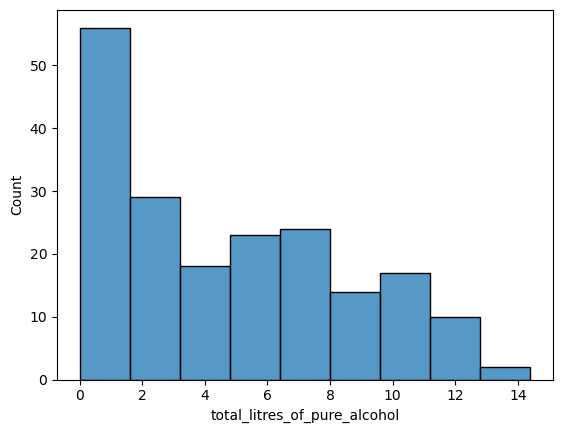

In [193]:
sns.histplot(data=df, x="total_litres_of_pure_alcohol")

The big conclusion of this variable is that the distribution of total litres of pure alcohol consumed per person in 2010 shows a slight right skew. We can see this in the histogram, where there is a right tail. The mean is 4.72 litres, meaning that on average, a country drinks 4.72 litres per person in 2010. The median is 4.2, which explains the right skew, as higher alcohol-consuming countries are pulling the average up (mean > median). The minimum reported alcohol consumption is 0 litres, and the highest is 14.4 litres. It is unlikely that a country has no one drinking alcohol, but due to certain countries’ rules and regulations, it is likely that there is no data reported for them. The standard deviation was 3.77, which is large compared to the mean, leading us to infer that many countries drink either significantly less or significantly more than the average. When this variable is presented in histogram form, I was fairly shocked to see nearly one-third of the data bunched up at the bottom; I was expecting a more evenly distributed graph.

<b> Question 1.2: </b> <br>
For this question, I will be using the continous variable beer_servings. As my data set didn't come with a usable categorical variable, i will create that variable. I will divide the previous variable of total_litres_of_pure_alcohol into heavy drinking countries and light drinking countries by using the median of 4.2 litres from our previous analysis. 

In [194]:
#Creating the new categorical variable
df['heavy_drinking'] = (df['total_litres_of_pure_alcohol'] > 4.2).astype(int)

#Calculate it's mean
df.groupby(['heavy_drinking'])['beer_servings'].mean()

heavy_drinking
0     35.226804
1    177.833333
Name: beer_servings, dtype: float64

In [195]:
#Calculate it's STD
df.groupby(['heavy_drinking'])['beer_servings'].std()

heavy_drinking
0    40.354034
1    93.279395
Name: beer_servings, dtype: float64

<Axes: xlabel='heavy_drinking', ylabel='beer_servings'>

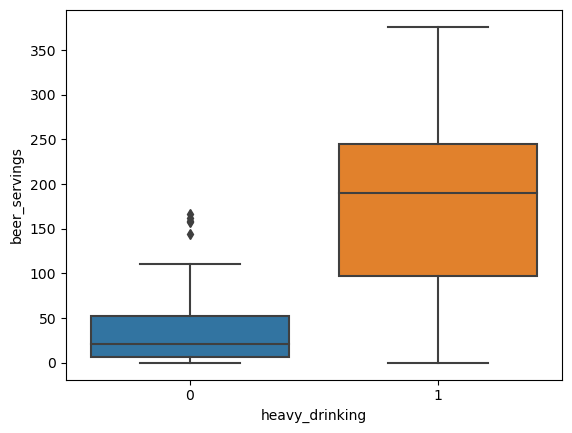

In [196]:
#Creating the histogram
sns.boxplot(data=df, x="heavy_drinking", y="beer_servings")

Analysis of MEAN: We can see that light drinking countries drink 35 beer servings per person, and high drinking countries drink 178 beers serving per person. So high drinking countries drinking ALOT more beer. <br>

Analysis of STD: We can see that light drinking countries has a STD of 40.35, which is larger than the mean so there is a very large spread. This helps us infer that countries with low alcohol consumption have a larger range of beer consumption, some drink alot, some dont. We can see that heavy drinking countries have a STD of 93 which is roughly half of the mean, thus countries that drink alot of alcohol tend to also drink alot of beer. 

Analysis of Histogram: From the histogram we can see that most light drinking countries tend to mostly drink little to no beer, but there are also few outliers that show that those light drinking countries drinking alot of beer. We can see that the heavier drinking countries are drinking alot more beer with a larger range. 

<b> Question 1.3 :</b> <br>
For this question, I want to explore more the outliers from the light drinking countries utilizing two categorical variables of heavy_drinking and a new variable of high_beer_consumption. This allows me to see if beer comsumption helps explain why some low total alcohol countries have outliers for beer. 

In [197]:
#New Variable for high beer consumption
df['high_beer'] = (df['beer_servings'] > df['beer_servings'].median()).astype(int)

#Using crosstab to evaluate them 
pd.crosstab(df.heavy_drinking, df.high_beer, normalize='columns')*100


high_beer,0,1
heavy_drinking,,
0,84.693878,14.736842
1,15.306122,85.263158


From the cross tabulation chart, we can see that light drinking countries roughly 85%, drink a little beer and 15% drink alot of beer. This explains why we saw the outliers in the previous graph. And this is reversed for heavier drinking countries. 85% drink alot of beer and 15% drink a low amonuts of beer. 

Visualizing this relationship. 

<Axes: xlabel='high_beer'>

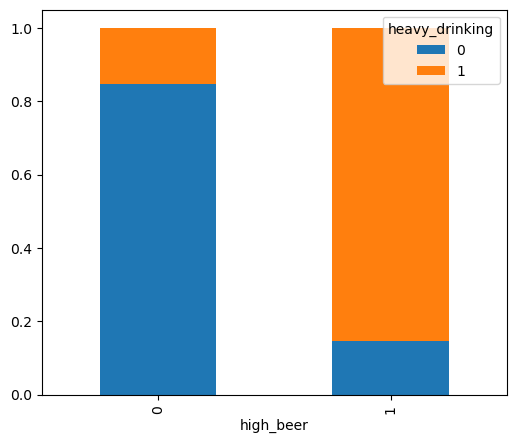

In [198]:
# Group by 'high_beer' and 'heavy_drinking', then count the occurrence
beer_heavy_counts = df.groupby(['high_beer', 'heavy_drinking']).size()

# Group by 'high_beer' only and count the occurrences
beer_counts = df.groupby(['high_beer']).size()

# Calculate the percentage
d_pct = beer_heavy_counts / beer_counts

# Unstack and plot the data
d_pct.unstack().plot(kind='bar', stacked=True, figsize=(6,5))
